作业

1. 对红楼梦分词
2. 研究前80回和后40回虚词分布的异同
3. 利用word2vec模型，研究贾宝玉和各人物之间的远近
4. 将各人物图画在二维平面坐标中
5. 利用topic model，研究前5回的主题

In [1]:
import re
import pandas as pd
import numpy as np
import jieba
import nltk
from gensim.models import Word2Vec
from gensim import corpora
from gensim import models
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
text = open('./红楼梦.txt','r',encoding='utf-8').read()
# 1、对红楼梦分词
def segdoc(document):    
    document = re.sub('[():?,.!\"\'（）：:？“”《》，。！·-、\d ]+', ' ', document)
    document = document.replace('\n',' ')
    document_cut = jieba.lcut(document)
    return document_cut 

seg_res = segdoc(text)  
print(" ".join(seg_res[:100]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Geoffrey\AppData\Local\Temp\jieba.cache
Loading model cost 0.877 seconds.
Prefix dict has been built succesfully.


  - - - - - - - - - - - -     第一回   甄士隐 梦幻 识通灵   贾雨村 风尘 怀 闺秀       此 开卷 第一回 也   作者 自云   因曾 历过 一番 梦幻 之后   故 将 真事 隐去   而 借   通灵   之 说   撰此   石头记   一书 也   故曰   甄士隐   云云   但书 所记 何事 何人   自又云   今 风尘碌碌   一事无成   忽 念及 当日 所有 之 女子   一一 细考 较 去   觉其 行止 见识   皆 出于 我 之上


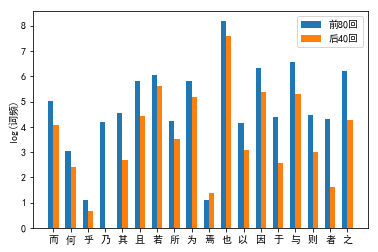

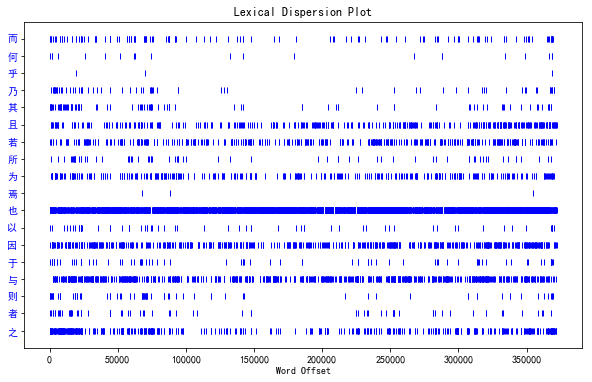

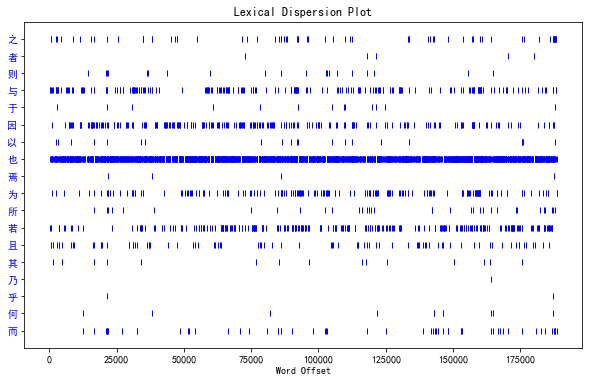

In [3]:
#2、研究前80回和后40回虚词分布的异同（词频柱状图或堆叠图或位置分布图都可以，画出其一即可）
empwords =  ["而","何","乎","乃","其","且","若","所","为","焉","也","以","因","于","与","则","者","之"]
idx_80 = text.find("第八十回")
#前80回
head_80 = text[0:idx_80]
head_80_seglist = segdoc(head_80)
head_80_count = []
#后40回
tail_40 = text[idx_80:]
tail_40_seglist = segdoc(tail_40)
tail_40_count = []
for w in empwords:
    head_80_count.append(head_80_seglist.count(w))
    tail_40_count.append(tail_40_seglist.count(w))
    
plt.figure(1) 
#词频的柱状图
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
total_width, n = 0.6, 2
width = total_width / n
x = np.arange(len(empwords))
plt.bar(x, np.log(head_80_count), width=width, label='前80回')  #直接画词频极差太大，故取了log
plt.bar(x+width, np.log(tail_40_count), width=width, label='后40回')
plt.xticks(x+width/2,empwords )#显示x坐标轴的标签,调整位置，使其落在两个直方图中间位置
plt.legend()
plt.ylabel("log(词频)")
plt.show()

plt.figure(2)
#使用nltk画出虚词出现的位置分布图
head_80_text = nltk.Text(head_80_seglist)
head_80_text.dispersion_plot(empwords)
tail_40_text = nltk.Text(tail_40_seglist)
tail_40_text.dispersion_plot(empwords)


In [4]:
#训练word2vec模型
model = Word2Vec([seg_res], min_count=10,size=2)

#耗时较长

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [5]:
#3、#利用word2vec模型，研究贾宝玉和各人物之间的远近，以下面几个人物为例：
peoples = ["宝玉","黛玉","宝钗","湘云","凤姐","元春","迎春","探春","惜春","妙玉","巧姐","秦氏","贾母"]
relations = {}
for p in peoples[1:]:
    #if p not in model:
    #    continue
    simi = model.wv.similarity("宝玉",p)
    relations[p] = simi
relations = sorted(relations.items(),key = lambda x:x[1],reverse = True)
relations

[('元春', 0.99997586),
 ('巧姐', 0.9995984),
 ('秦氏', 0.9976383),
 ('凤姐', 0.9917917),
 ('妙玉', 0.9869124),
 ('湘云', 0.98088014),
 ('惜春', 0.97898674),
 ('探春', 0.95695394),
 ('贾母', 0.8962101),
 ('迎春', 0.8854042),
 ('宝钗', 0.87843215),
 ('黛玉', 0.8172213)]

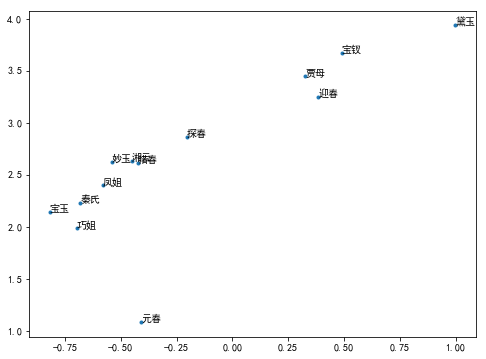

In [6]:
#4、将各人物图画在二维平面坐标中
df = pd.DataFrame([model.wv[wd] for wd in peoples])
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
plt.plot(df.iloc[:,0],df.iloc[:,1],'.')
for i in range(df.shape[0]):
    x = df.iloc[i,0]
    y = df.iloc[i,1]
    text = peoples[i]
    plt.text(x,y,text,fontsize=10)
plt.show()

In [7]:
#5、利用topic model，研究前5回的主题 ， LDA和LSI都可以
freq = {}
for word in seg_res:
    freq[word] = freq.get(word,0) + 1
corpus = [w for w in seg_res if freq[w] > 1 and len(w)>1]
dictionary = corpora.Dictionary([corpus])

In [8]:
parts = ['第一回','第二回','第三回','第四回','第五回','第六回']
for i in range(5):
    print ("\n================= " + parts[i] + " =================" )
    pos_begin = seg_res.index(parts[i])
    pos_end = seg_res.index(parts[i+1])
    part_corpus = [dictionary.doc2bow(seg_res[pos_begin:pos_end])]
    lda = models.LdaModel(corpus=part_corpus, id2word=dictionary, num_topics=5)
    print(lda.print_topics(2))


================= 第一回 =================
[(4, '0.001*"士隐" + 0.001*"道人" + 0.001*"雨村" + 0.001*"一段" + 0.001*"故事" + 0.000*"弟子" + 0.000*"原来" + 0.000*"那僧" + 0.000*"如此" + 0.000*"自己"'), (0, '0.001*"士隐" + 0.001*"道人" + 0.001*"雨村" + 0.000*"一段" + 0.000*"世人" + 0.000*"那僧" + 0.000*"那僧道" + 0.000*"不知" + 0.000*"蠢物" + 0.000*"故事"')]

================= 第二回 =================
[(0, '0.003*"雨村" + 0.001*"一个" + 0.001*"如今" + 0.001*"两个" + 0.001*"女儿" + 0.001*"子兴道" + 0.001*"不能" + 0.001*"学生" + 0.001*"老爹" + 0.001*"封肃"'), (3, '0.001*"雨村" + 0.001*"如今" + 0.001*"一个" + 0.001*"老爹" + 0.001*"不能" + 0.001*"子兴道" + 0.001*"读书" + 0.001*"学生" + 0.000*"两个" + 0.000*"女儿"')]

================= 第三回 =================
[(3, '0.002*"宝玉" + 0.002*"黛玉" + 0.002*"王夫人" + 0.001*"一个" + 0.001*"贾母" + 0.001*"两个" + 0.001*"妹妹" + 0.001*"丫鬟" + 0.001*"雨村" + 0.001*"姊妹"'), (0, '0.003*"黛玉" + 0.002*"宝玉" + 0.002*"一个" + 0.001*"丫鬟" + 0.001*"王夫人" + 0.001*"两个" + 0.001*"贾母" + 0.001*"妹妹" + 0.001*"姊妹" + 0.001*"一时"')]

================= 第四回 =================
[(1, '0.001*

In [ ]:
#基于词向量的《红楼梦》前80回合后80回语言对比研究
#《列子》语言对比研究
#可参看文章《红楼梦》计量风格学研究